

# **Import Libraries**



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# **Load the Dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
! ls

customer_engagement_dirty_data.csv  sample_data


In [ ]:
df_data = pd.read_csv("customer_engagement_dirty_data.csv")

# **Inspect the structure of the dataset:**

In [ ]:
df_data.columns

Index(['article_id', 'date_time_publish', 'authr', 'magazine_name',
       'article_type', 'gender_of_reader', 'age_of_reader',
       'occupation_of_reader', 'date_time_customer_opened_article',
       'share_time', 'time_spent', 'is_customer_subscriber', 'shared_article',
       'liked_article', 'commented_on_article', 'country_of_publisher',
       'city_of_publisher', 'country_of_reader', 'city_of_reader', 'user_id',
       'number_of_articles_read_by_user', 'unique_readers_of_magazine',
       'average_time_spent_of_magazine', 'num_subscriber_of_magazine',
       'subscription_rate_of_magazine'],
      dtype='object')

In [ ]:
df_data.head()

,article_id,date_time_publish,authr,magazine_name,article_type,gender_of_reader,age_of_reader,occupation_of_reader,date_time_customer_opened_article,share_time,...,country_of_publisher,city_of_publisher,country_of_reader,city_of_reader,user_id,number_of_articles_read_by_user,unique_readers_of_magazine,average_time_spent_of_magazine,num_subscriber_of_magazine,subscription_rate_of_magazine
0,1,2023-10-27 05:29:34,Owen Turner,Closer,Tech,Male,unknown,Musician,2024-02-08 13:15:30,2023-02-11 11:48:46,...,Germany,Berlin,Germany,Munich,918,5,160,1868.890909,77,0.466667
1,2,2023-11-23 16:01:21,Charlotte Lewis,TV Movie,Biography,Male,unknown,Engineer,2023-11-17 02:30:24,2023-02-19 18:35:19,...,France,Lyon,France,Paris,1974,4,161,1810.771084,69,0.415663
2,3,2023-02-01 10:41:00,William Wilson,Grazia,Horror,Diverse,unknown,Pilot,2024-05-17 20:21:14,2023-09-06 01:04:50,...,UK,Birmingham,UK,Manchester,263,3,318,1865.914773,175,0.497159
3,4,2023-07-21 02:33:28,Scarlett Roberts,Télé Star,Movie Review,Female,unknown,Journalist,2023-05-06 20:17:02,2023-09-18 21:29:18,...,Poland,Krakow,Poland,Lodz,616,2,167,1804.763736,92,0.505495
4,5,2024-02-02 02:51:05,Amelia Hall,Télé Star,Cooking Recipe,Male,unknown,Journalist,2023-12-06 11:15:46,2023-08-28 09:40:01,...,Germany,Frankfurt,China,Shanghai,1050,3,167,1804.763736,92,0.505495


In [ ]:
# Get the summary of the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   article_id                         2100 non-null   int64  
 1   date_time_publish                  2100 non-null   object 
 2   authr                              2100 non-null   object 
 3   magazine_name                      2100 non-null   object 
 4   article_type                       2100 non-null   object 
 5   gender_of_reader                   2048 non-null   object 
 6   age_of_reader                      2048 non-null   object 
 7   occupation_of_reader               2047 non-null   object 
 8   date_time_customer_opened_article  2100 non-null   object 
 9   share_time                         2100 non-null   object 
 10  time_spent                         2100 non-null   int64  
 11  is_customer_subscriber             2100 non-null   objec

In [ ]:
# Check for missing values
df_data.isnull().sum()

,0
article_id,0
date_time_publish,0
authr,0
magazine_name,0
article_type,0
gender_of_reader,52
age_of_reader,52
occupation_of_reader,53
date_time_customer_opened_article,0
share_time,0


In [ ]:
# Statistical summary of numerical columns
df_stats = df_data.describe()
df_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
article_id,2100.0,999.988095,579.124308,1.000000,493.750000,1004.500000,1503.250000,2000.000000
time_spent,2100.0,1880.623810,1153.899934,60.000000,965.500000,1875.000000,2702.500000,10000.000000
user_id,2100.0,998.407619,586.320315,2.000000,467.000000,1007.000000,1516.250000,2000.000000
number_of_articles_read_by_user,2100.0,2.040952,1.032229,1.000000,1.000000,2.000000,3.000000,5.000000
unique_readers_of_magazine,2100.0,186.443333,61.722474,140.000000,151.000000,165.000000,168.000000,318.000000
average_time_spent_of_magazine,2100.0,1842.156705,50.599506,1751.736842,1810.771084,1859.040000,1865.914773,1955.335443
num_subscriber_of_magazine,2100.0,98.200476,36.491018,69.000000,77.000000,85.000000,92.000000,175.000000
subscription_rate_of_magazine,2100.0,0.493690,0.030102,0.415663,0.490446,0.497159,0.512658,0.525714


# **Basic Data Cleaning**

Most of the time we get datasets which are not cleaned. The have duplicated rows, column names are not clear and readable, the data type of the column is not correct or there are missing values which need to be removed or filled.

## 1. Duplications

In [ ]:
# Check for duplicates
df_data.duplicated().sum()

99

where are the duplicated?

In [ ]:
df_data[df_data.duplicated()]

,article_id,date_time_publish,authr,magazine_name,article_type,gender_of_reader,age_of_reader,occupation_of_reader,date_time_customer_opened_article,share_time,...,country_of_publisher,city_of_publisher,country_of_reader,city_of_reader,user_id,number_of_articles_read_by_user,unique_readers_of_magazine,average_time_spent_of_magazine,num_subscriber_of_magazine,subscription_rate_of_magazine
2000,406,2023-03-19 04:57:23,Lucas Carter,Take a Break,Biography,Male,39.0,Artist,2023-01-23 19:40:24,2024-04-22 00:10:31,...,UK,Birmingham,Australia,Melbourne,1656,4,151,1955.335443,81,0.512658
2001,1191,2023-07-02 18:36:20,Henry Robinson,Heat,Movie Review,Diverse,53.0,Teacher,2024-02-10 20:42:57,2024-06-23 11:33:15,...,UK,Glasgow,UK,NaN,1528,3,146,1751.736842,71,0.467105
2002,1133,2023-11-19 01:49:04,Mia Harris,TV Movie,Home Decor Tips,Female,19.0,Travel Agent,2024-03-17 00:24:51,2024-05-25 18:31:19,...,France,Toulouse,USA,New York,84,2,161,1810.771084,69,0.415663
2003,732,2024-04-05 14:40:57,Benjamin Lee,Télé Star,Movie Review,Male,60.0,Writer,2023-02-05 17:20:29,2024-05-07 22:04:27,...,Germany,Cologne,Germany,Berlin,1450,1,167,1804.763736,92,0.505495
2004,1755,2023-12-26 13:03:32,Amelia Hall,InStyle,Romantic,Diverse,48.0,Graphic Designer,2023-03-15 03:29:22,2023-08-09 00:03:57,...,Germany,Munich,Japan,Osaka,268,5,168,1838.731429,92,0.525714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000,2023-04-15 06:55:13,William Wilson,Gala,Tech,Female,67.0,Electrician,2023-11-13 22:46:14,2023-01-13 16:19:11,...,Poland,Lodz,Canada,Montreal,843,1,165,1859.040000,92,0.525714
2096,1928,2024-03-07 10:52:34,Abigail Green,Closer,Politics,Female,67.0,Accountant,2023-08-24 04:07:24,2023-04-05 05:06:32,...,Germany,Hamburg,Germany,Hamburg,1815,2,160,1868.890909,77,0.466667
2097,81,2023-08-12 10:19:12,Aiden Scott,Grazia,Cooking Recipe,Diverse,65.0,Housewife,2023-06-23 20:07:41,2024-02-02 05:11:12,...,France,Marseille,France,Toulouse,1689,1,318,1865.914773,175,0.497159
2098,1855,2023-10-14 01:16:58,Olivia Moore,Closer,Horror,Diverse,25.0,Doctor,2024-06-19 09:24:18,2023-05-05 18:01:53,...,Poland,Warsaw,Poland,NaN,220,1,160,1868.890909,77,0.466667


getting the count values of each article ID to found how many times the duplicated article ID has been repeated?

In [ ]:
df_data['article_id'].value_counts().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,article_id,count
0,2000,2
64,1206,2
74,1443,2
73,580,2
72,1502,2
71,520,2
70,512,2
69,507,2
68,1534,2
67,1358,2


It looks like maximum 2 times the ID has been repeated.
Now we can drop duplications.

In [ ]:
# Drop duplicates (if any)
df_data.drop_duplicates(inplace=True)

In [ ]:
df_data.duplicated().sum()

0

## 2. Missing Values

Now we can look for missing values. First which columns and rows have missing values?
1. How many missing values in total do we have?
2. Where are those missing values? Find them.
3. Drop the rows that have missing values or fill them with a specific values?

In [ ]:
df_data.isnull().sum().sum()

250

In [ ]:
df_data[df_data.isnull().any(axis=1)]

,article_id,date_time_publish,authr,magazine_name,article_type,gender_of_reader,age_of_reader,occupation_of_reader,date_time_customer_opened_article,share_time,...,country_of_publisher,city_of_publisher,country_of_reader,city_of_reader,user_id,number_of_articles_read_by_user,unique_readers_of_magazine,average_time_spent_of_magazine,num_subscriber_of_magazine,subscription_rate_of_magazine
9,10,2023-10-06 02:31:26,Owen Turner,InStyle,Biography,NaN,unknown,Sales Manager,2023-03-08 05:24:54,2023-01-23 01:56:27,...,Poland,Gdansk,Poland,Krakow,523,1,168,1838.731429,92,0.525714
24,25,2023-02-27 06:39:30,Isabella Anderson,Grazia,Biography,Female,63.0,NaN,2023-03-08 21:11:27,2024-06-17 21:26:55,...,Poland,Warsaw,Poland,Warsaw,308,3,318,1865.914773,175,0.497159
26,27,2023-09-14 11:19:20,Harper Young,Take a Break,Family,Male,18.0,NaN,2024-02-02 00:07:44,2024-05-14 11:19:46,...,Germany,Frankfurt,Germany,Munich,1619,2,151,1955.335443,81,0.512658
34,35,2024-05-12 10:21:26,James Taylor,InStyle,Comedy,Male,49.0,NaN,2024-05-13 21:14:23,2024-01-01 22:13:01,...,Poland,Gdansk,Poland,Lodz,1078,1,168,1838.731429,92,0.525714
41,42,2023-02-18 08:58:32,Avery Parker,Heat,Politics,NaN,31.0,Pilot,2024-02-18 16:16:06,2023-11-15 14:01:07,...,UK,Birmingham,UK,Glasgow,331,2,146,1751.736842,71,0.467105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,1968,2024-01-09 08:59:15,Benjamin Lee,Heat,Movie Review,Female,26.0,NaN,2023-02-21 21:33:55,2023-06-24 07:29:52,...,Poland,Lodz,India,Bangalore,791,2,146,1751.736842,71,0.467105
1972,1973,2023-10-14 16:25:14,Liam Adams,TV Movie,Family,NaN,39.0,Electrician,2023-11-27 06:01:34,2024-04-06 14:23:36,...,France,Toulouse,France,Paris,1820,3,161,1810.771084,69,0.415663
1976,1977,2024-06-01 17:14:56,Michael Brown,Grazia,Politics,Female,NaN,Architect,2023-12-27 19:33:00,2023-12-11 23:00:13,...,Poland,Lodz,Poland,NaN,1363,4,318,1865.914773,175,0.497159
1977,1978,2024-01-13 21:36:13,Michael Brown,Twój Styl,Biography,Male,22.0,Electrician,2023-04-16 12:48:41,2024-05-16 10:55:10,...,Poland,Warsaw,Germany,NaN,1581,1,151,1775.993631,77,0.490446


We see we have so many rows that have missing values and dropping them will reduce the size of the dataset dramatically. Instead of dropping them, we can fill the missing values with a specific values and mentioning that in the report.

Let's see which column has the missing values again:

In [ ]:
df_data[df_data.columns[df_data.isna().any()]]

,gender_of_reader,age_of_reader,occupation_of_reader,country_of_reader,city_of_reader
0,Male,unknown,Musician,Germany,Munich
1,Male,unknown,Engineer,France,Paris
2,Diverse,unknown,Pilot,UK,Manchester
3,Female,unknown,Journalist,Poland,Lodz
4,Male,unknown,Journalist,China,Shanghai
...,...,...,...,...,...
1996,Diverse,56.0,Mechanic,China,Beijing
1997,Female,33.0,Artist,Germany,Berlin
1998,Diverse,18.0,Doctor,France,Nice
1999,Female,67.0,Electrician,Canada,Montreal


The column `age`, `gender`, `occupation` all can be filled with `unknown`.

In [ ]:
column_to_be_filled_unknown = ['gender_of_reader', 'occupation_of_reader']
df_data[column_to_be_filled_unknown] = df_data[column_to_be_filled_unknown].fillna("unknown")

For the `city_of_reader` and `country_of_reader` we can have this assumption that the article has been published in country UK, city London, therefore the reader should also match. but that might not be true. So, let see if there is a relationship between country, city of the readers and publisher.

In [ ]:
# Let's analyze the relationship between publisher location (country_of_publisher) and reader location (country_of_reader)

# Aggregating data to find the counts of readers for each publisher country
publisher_reader_country_relation = df_data.groupby(['country_of_publisher', 'country_of_reader']).size().unstack(fill_value=0)

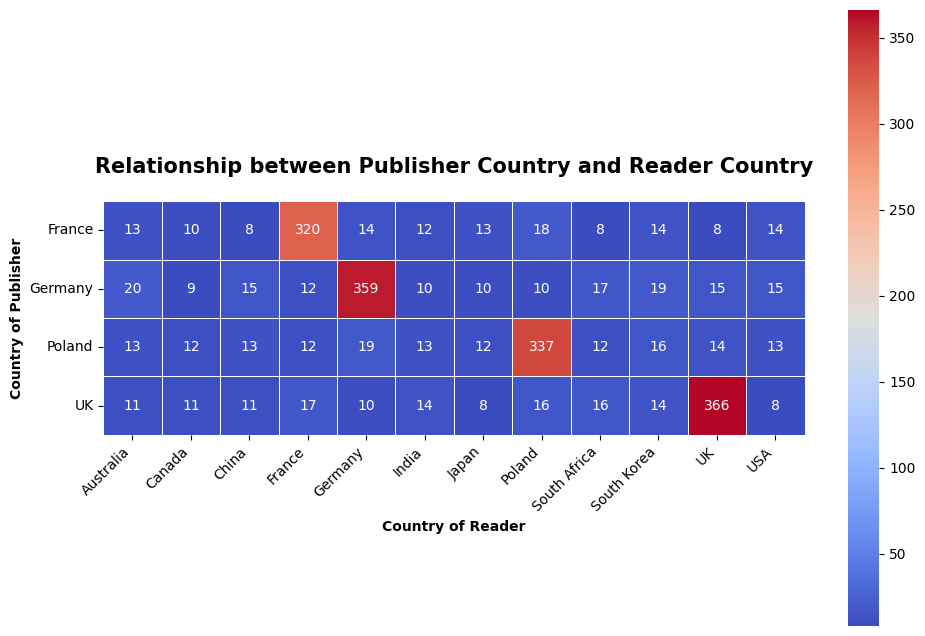

In [ ]:
# Set a larger figure size for better readability
plt.figure(figsize=(10, 8))

# Customizing the heatmap with a fancier color palette and annotations
sns.heatmap(publisher_reader_country_relation,
            cmap='coolwarm',
            annot=True,
            fmt='d',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'shrink': 0.8},
            square=True)

# Adding titles and labels with a more stylish font and size
plt.title('Relationship between Publisher Country and Reader Country', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Country of Reader', fontsize=10, fontweight='bold')
plt.ylabel('Country of Publisher', fontsize=10, fontweight='bold')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_data[df_data.country_of_reader.isnull()][['country_of_publisher', 'country_of_reader', 'city_of_reader']].iloc[:10]

,country_of_publisher,country_of_reader,city_of_reader
43,Germany,NaN,Cologne
55,UK,NaN,Birmingham
64,UK,NaN,Birmingham
90,UK,NaN,London
136,Poland,NaN,Lodz
219,Poland,NaN,Wroclaw
272,Poland,NaN,Poznan
295,Germany,NaN,Stuttgart
332,Germany,NaN,Brisbane
338,UK,NaN,Leeds


It looks like we have the city of readers but not the country. In this case we should fill the NaN values with the correct country name.

In [ ]:
# Reader countries and cities
reader_countries_cities = {
    'Germany': ['Berlin', 'Munich', 'Hamburg', 'Cologne', 'Frankfurt', 'Stuttgart'],
    'France': ['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes'],
    'UK': ['London', 'Birmingham', 'Manchester', 'Glasgow', 'Leeds', 'Liverpool'],
    'Poland': ['Warsaw', 'Krakow', 'Wroclaw', 'Gdansk', 'Poznan', 'Lodz'],
    'USA': ['New York', 'Los Angeles', 'Chicago'],
    'India': ['Mumbai', 'Delhi', 'Bangalore'],
    'Japan': ['Tokyo', 'Osaka', 'Kyoto'],
    'South Korea': ['Seoul', 'Busan', 'Incheon'],
    'Australia': ['Melbourne', 'Brisbane', 'Perth'],
    'China': ['Beijing', 'Shanghai', 'Shenzhen'],
    'South Africa': ['Johannesburg', 'Cape Town', 'Durban'],
    'Canada': ['Toronto', 'Montreal', 'Vancouver']
}

In [ ]:
# Create a reverse mapping from city to country
city_to_country = {}
for country, cities in reader_countries_cities.items():
    for city in cities:
        city_to_country[city] = country

In [ ]:
df_data['country_of_reader'] = df_data['country_of_reader'].fillna(df_data['city_of_reader'].map(city_to_country))

Now, let's check how many rows cannot be mapped?

In [ ]:
df_data[df_data.country_of_reader.isnull()][['country_of_publisher', 'country_of_reader', 'city_of_reader']]

,country_of_publisher,country_of_reader,city_of_reader
528,France,NaN,NaN
1702,Poland,NaN,NaN


Ok, still we have two records that have no country and city of readers. now we can fillna them with unknow.

In [ ]:
df_data[['country_of_reader', 'city_of_reader']] = df_data[['country_of_reader', 'city_of_reader']].fillna("unknown")

In [ ]:
df_data.country_of_reader.isnull().sum()

0

## 3. Change Data Types

Data Type are the most important part of the data cleaning. If you choose the wrong data type at the beginning, it would be hard to come back and change it. So, it is better to change the data type now!

**Datetime**: Let's first take a look at the columns with DateTime data type.

In [ ]:
date_time_columns = ['date_time_publish', 'date_time_customer_opened_article', 'share_time']
df_data[date_time_columns]

,date_time_publish,date_time_customer_opened_article,share_time
0,2023-10-27 05:29:34,2024-02-08 13:15:30,2023-02-11 11:48:46
1,2023-11-23 16:01:21,2023-11-17 02:30:24,2023-02-19 18:35:19
2,2023-02-01 10:41:00,2024-05-17 20:21:14,2023-09-06 01:04:50
3,2023-07-21 02:33:28,2023-05-06 20:17:02,2023-09-18 21:29:18
4,2024-02-02 02:51:05,2023-12-06 11:15:46,2023-08-28 09:40:01
...,...,...,...
1996,2023-07-25 03:41:41,2023-10-23 12:02:14,2023-11-22 21:09:20
1997,2023-01-17 10:37:13,2023-07-14 01:42:53,2023-03-23 23:04:36
1998,2024-04-01 06:38:34,2023-03-21 09:27:29,2024-06-30 07:19:19
1999,2023-04-15 06:55:13,2023-11-13 22:46:14,2023-01-13 16:19:11


THe datatype in the dataframe is `object` which need to be changed.

In [ ]:
# Converting date columns to datetime format
df_data['date_time_publish'] = pd.to_datetime(df_data['date_time_publish'])
df_data['date_time_customer_opened_article'] = pd.to_datetime(df_data['date_time_customer_opened_article'])
df_data['share_time'] = pd.to_datetime(df_data['share_time'])

In [ ]:
df_data[date_time_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 0 to 2028
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date_time_publish                  2001 non-null   datetime64[ns]
 1   date_time_customer_opened_article  2001 non-null   datetime64[ns]
 2   share_time                         2001 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 127.1 KB


**String:** Some columns have string values and need to be converted to `str`.

In [ ]:
string_columns = ['authr', 'magazine_name', 'article_type', 'gender_of_reader', 'occupation_of_reader', 'country_of_publisher', 'city_of_publisher', 'country_of_reader', 'city_of_reader']
df_data[string_columns]

,authr,magazine_name,article_type,gender_of_reader,occupation_of_reader,country_of_publisher,city_of_publisher,country_of_reader,city_of_reader
0,Owen Turner,Closer,Tech,Male,Musician,Germany,Berlin,Germany,Munich
1,Charlotte Lewis,TV Movie,Biography,Male,Engineer,France,Lyon,France,Paris
2,William Wilson,Grazia,Horror,Diverse,Pilot,UK,Birmingham,UK,Manchester
3,Scarlett Roberts,Télé Star,Movie Review,Female,Journalist,Poland,Krakow,Poland,Lodz
4,Amelia Hall,Télé Star,Cooking Recipe,Male,Journalist,Germany,Frankfurt,China,Shanghai
...,...,...,...,...,...,...,...,...,...
1996,Matthew King,Closer,Comedy,Diverse,Mechanic,France,Toulouse,China,Beijing
1997,Henry Robinson,Bravo,Home Decor Tips,Female,Artist,UK,Glasgow,Germany,Berlin
1998,Charlotte Lewis,Télé Star,Cooking Recipe,Diverse,Doctor,France,Nantes,France,Nice
1999,William Wilson,Gala,Tech,Female,Electrician,Poland,Lodz,Canada,Montreal


In [ ]:
# The .astype(str) does not change the data type to string!
df_data[string_columns] = df_data[string_columns].astype('string')

In [ ]:
df_data[string_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   authr                 2001 non-null   string
 1   magazine_name         2001 non-null   string
 2   article_type          2001 non-null   string
 3   gender_of_reader      2001 non-null   string
 4   occupation_of_reader  2001 non-null   string
 5   country_of_publisher  2001 non-null   string
 6   city_of_publisher     2001 non-null   string
 7   country_of_reader     2001 non-null   string
 8   city_of_reader        2001 non-null   string
dtypes: string(9)
memory usage: 220.9 KB


In [ ]:
df_data['authr'].head()

,authr
0,Owen Turner
1,Charlotte Lewis
2,William Wilson
3,Scarlett Roberts
4,Amelia Hall


Integer: Another data type which makes sense for columns such as `age_of_reader`

In [ ]:
# we have `unknown` values in the column so we cannot coonvert that directly to Int.
df_data['age_of_reader'].unique()

array(['unknown', '65.0', '68.0', '27.0', '25.0', '48.0', '39.0', '59.0',
       '26.0', '19.0', '63.0', '67.0', '18.0', '45.0', '66.0', '43.0',
       '47.0', '44.0', '49.0', '32.0', '37.0', '57.0', '41.0', '31.0',
       '58.0', '42.0', nan, '34.0', '29.0', '56.0', '55.0', '61.0',
       '54.0', '50.0', '53.0', '21.0', '64.0', '30.0', '52.0', '35.0',
       '51.0', '24.0', '23.0', '22.0', '46.0', '33.0', '20.0', '60.0',
       '40.0', '28.0', '62.0', '38.0', '69.0', '36.0'], dtype=object)

In [ ]:
df_data['age_of_reader'] = df_data['age_of_reader'].replace('unknown', 0)
df_data['age_of_reader'] = df_data['age_of_reader'].fillna(0)

In [ ]:
# Step 1: Convert the column to numeric (from strings like '65.0')
df_data['age_of_reader'] = pd.to_numeric(df_data['age_of_reader'], errors='coerce')

In [ ]:
df_data['age_of_reader'].unique()

array([ 0., 65., 68., 27., 25., 48., 39., 59., 26., 19., 63., 67., 18.,
       45., 66., 43., 47., 44., 49., 32., 37., 57., 41., 31., 58., 42.,
       34., 29., 56., 55., 61., 54., 50., 53., 21., 64., 30., 52., 35.,
       51., 24., 23., 22., 46., 33., 20., 60., 40., 28., 62., 38., 69.,
       36.])

In [ ]:
# Step 2: Convert the numeric column from float to integer
df_data['age_of_reader'] = df_data['age_of_reader'].astype(int)

**Binary:** Sometimes the data is binary categorical, yes or no, True or False. We have four columns that it seems can be converted.

In [ ]:
# Converting categorical variables like `is_customer_subscriber`, `shared_article`, `liked_article` into binary format (0/1)
binary_columns = ['is_customer_subscriber', 'shared_article', 'liked_article', 'commented_on_article']
df_data[binary_columns] = df_data[binary_columns].replace({'yes': 1, 'no': 0}, regex=True)

In [ ]:
df_data[binary_columns].head()

,is_customer_subscriber,shared_article,liked_article,commented_on_article
0,Yes,No,Yes,No
1,Yes,No,No,No
2,No,No,Yes,Yes
3,No,Yes,No,Yes
4,No,No,No,No


## 4. Renaming the columns
Some of the column names are missspelled or very long.They should be renamed.

In [ ]:
df_data.rename(columns={'authr': 'author'}, inplace=True)

# Statistical Analysis

## Correlation between features

Here we would like to know if between the features (columns) there is any relationship such as correlation or causation.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'article_id'),
  Text(0, 1.5, 'age_of_reader'),
  Text(0, 2.5, 'time_spent'),
  Text(0, 3.5, 'user_id'),
  Text(0, 4.5, 'number_of_articles_read_by_user'),
  Text(0, 5.5, 'unique_readers_of_magazine'),
  Text(0, 6.5, 'average_time_spent_of_magazine'),
  Text(0, 7.5, 'num_subscriber_of_magazine'),
  Text(0, 8.5, 'subscription_rate_of_magazine')])

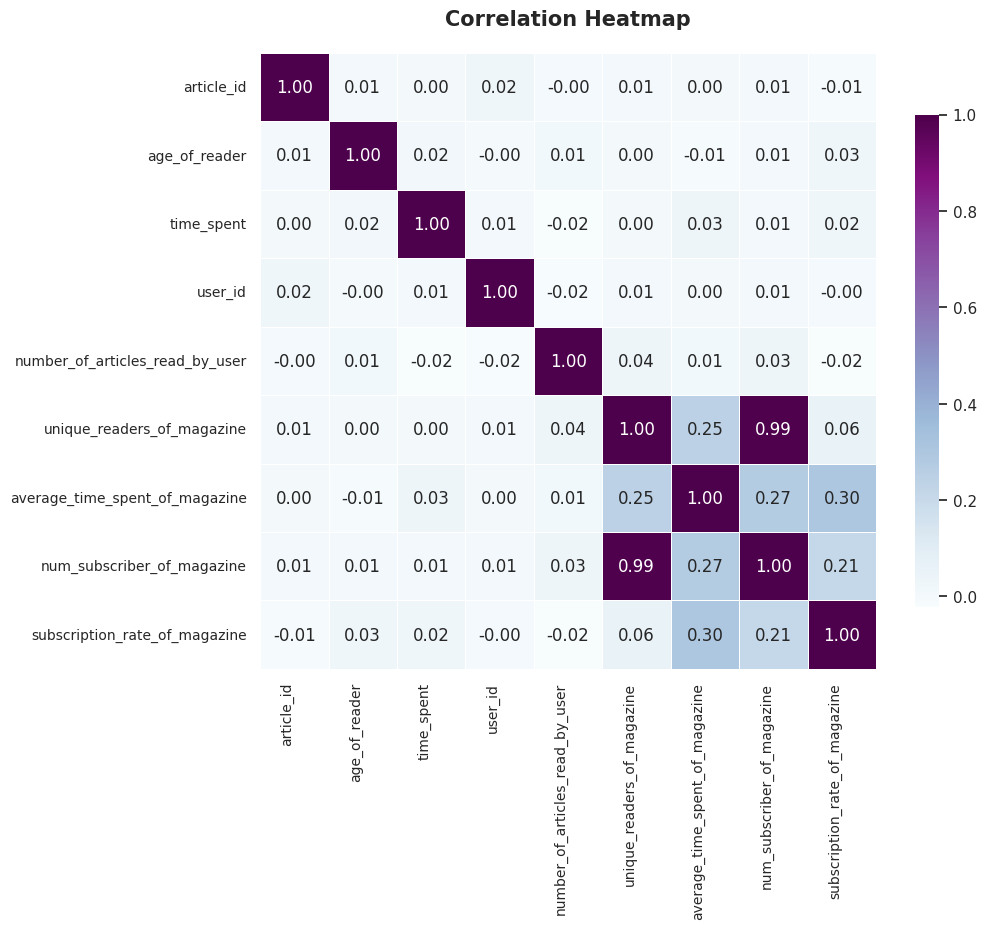

In [ ]:
plt.figure(figsize=(10, 8))
corr = df_data.corr(numeric_only=True)
sns.heatmap(corr,
            cmap='BuPu',
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'shrink': 0.8},
            square=True)

# Adding titles and labels with a more stylish font and size
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold', pad=20)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

Observation:
1. There is a strong positive correlation between `unique_readers_of_magazine` and the `num_subscriber_of_magazine`.
The correlation of 0.99 between `unique_readers_of_magazine` and `num_subscriber_of_magazine` reveals that these two metrics are almost perfectly positively correlated. This strong relationship indicates that increases in the subscriber base are almost directly proportional to increases in the number of unique readers, underscoring the significant role subscribers play in driving readership. Also, it can show us, as soon as we get a subscriber, the person become one of the regular reader.

2. There is a 0.3 positive correlationbetween `average_time_spent_of_magazine` and the `subscribtion_rate_of_magazine`.
One possible reason would be the `reader engagement`. Magazines that engage readers more (leading to higher time spent) might have a better chance of converting readers into subscribers.

3. There is 0.0 correlation between if the customer is a subscriber and the number of article read by the customer. This shows the behavior of subscribers and non-subscribers, in this case, it does not show any clear pattern or relationship regarding how many articles they read. The reading behavior does not seem to be influenced by whether or not the customer subscribes to the magazine.

## Distributions

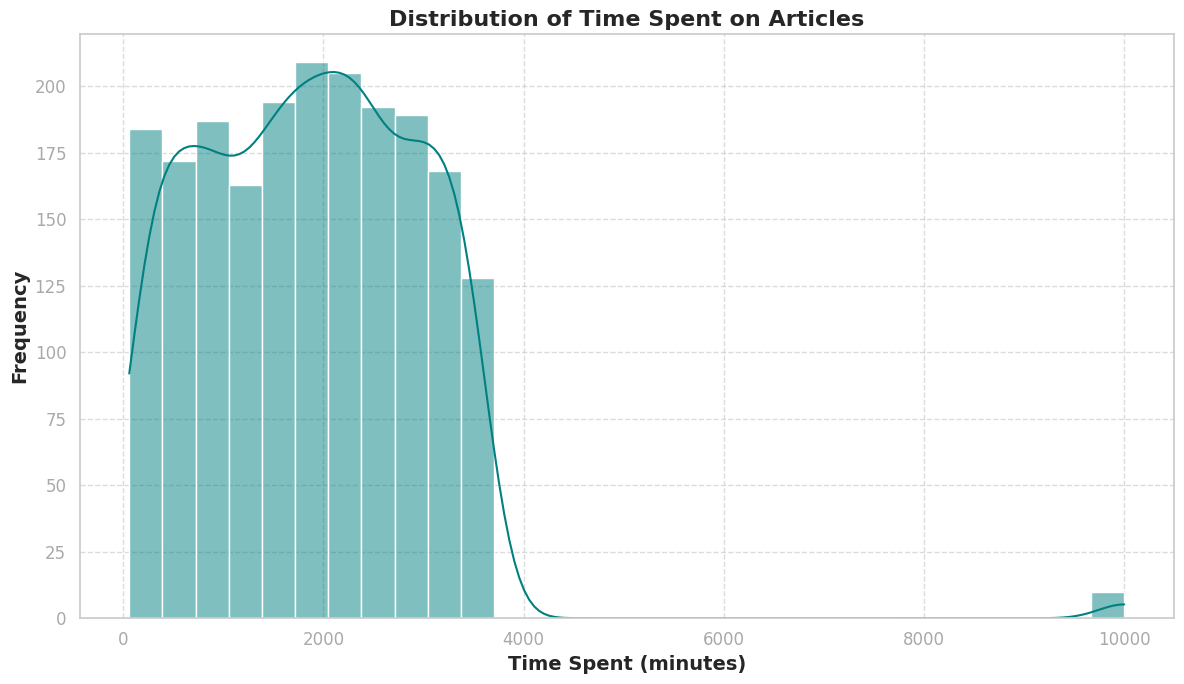

In [ ]:
# Set the style and context
sns.set(style='whitegrid', palette='pastel')

# Create the plot
plt.figure(figsize=(12, 7))
sns.histplot(df_data['time_spent'], bins=30, color='teal', kde=True)

# Add titles and labels with customization
plt.title('Distribution of Time Spent on Articles', fontsize=16, weight='bold')
plt.xlabel('Time Spent (minutes)', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')

# Customize the gridlines and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='darkgray')
plt.yticks(fontsize=12, color='darkgray')

# Show the plot
plt.tight_layout()
plt.show()

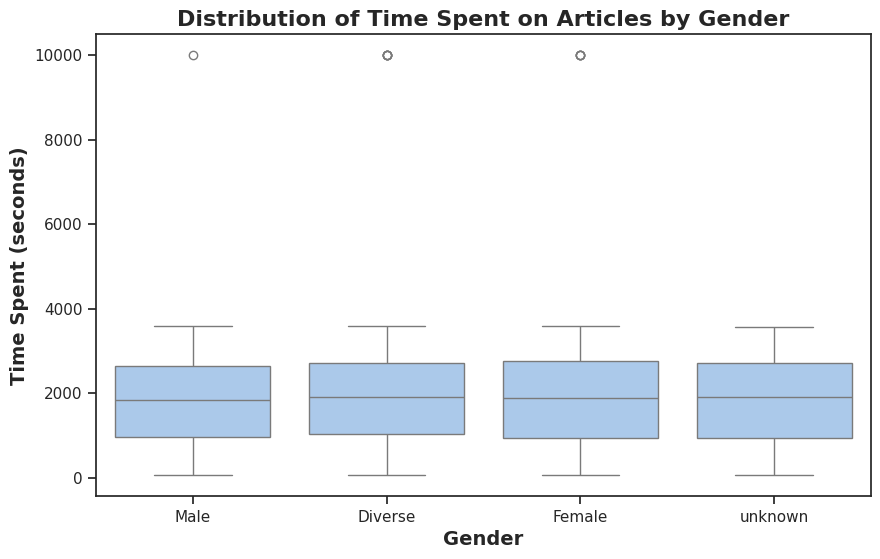

In [ ]:
# Set the style and context
sns.set_theme(style="ticks", palette="pastel")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender_of_reader', y='time_spent', data=df_data)

# Add titles and labels with customization
plt.title('Distribution of Time Spent on Articles by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Time Spent (seconds)', fontsize=14, weight='bold')

# Show the plot
plt.show()

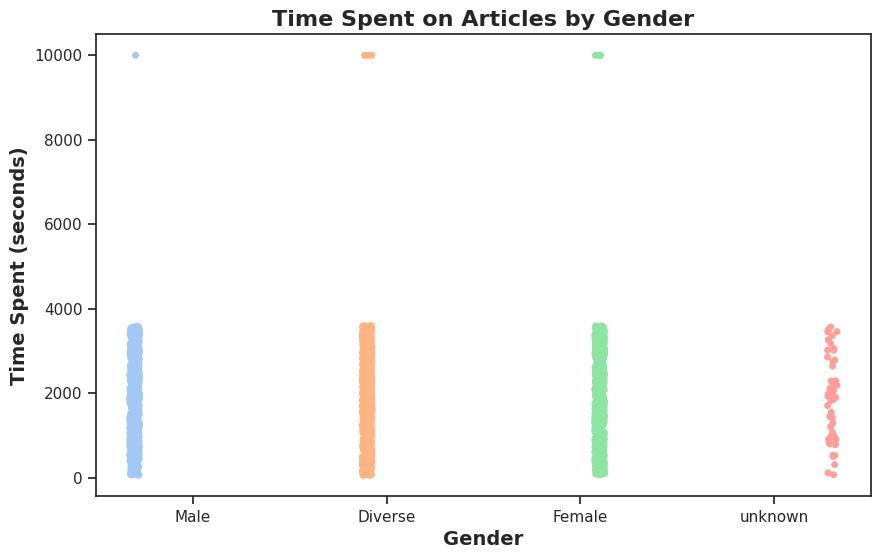

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='gender_of_reader', y='time_spent', data=df_data, jitter=True, palette='pastel', dodge=True, hue='gender_of_reader')

# Add titles and labels with

plt.title('Time Spent on Articles by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Time Spent (seconds)', fontsize=14, weight='bold')

plt.show()

**Statistical Test:** To determine if the differences in time spent on articles between genders are statistically significant, you can perform an independent t-test.

In [ ]:
# Separate data by gender
male_time_spent = df_data[df_data['gender_of_reader'] == 'Male']['time_spent']
female_time_spent = df_data[df_data['gender_of_reader'] == 'Female']['time_spent']

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_time_spent, female_time_spent)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in time spent between genders.")
else:
    print("There is no statistically significant difference in time spent between genders.")

T-statistic: -1.11
P-value: 0.2689
There is no statistically significant difference in time spent between genders.


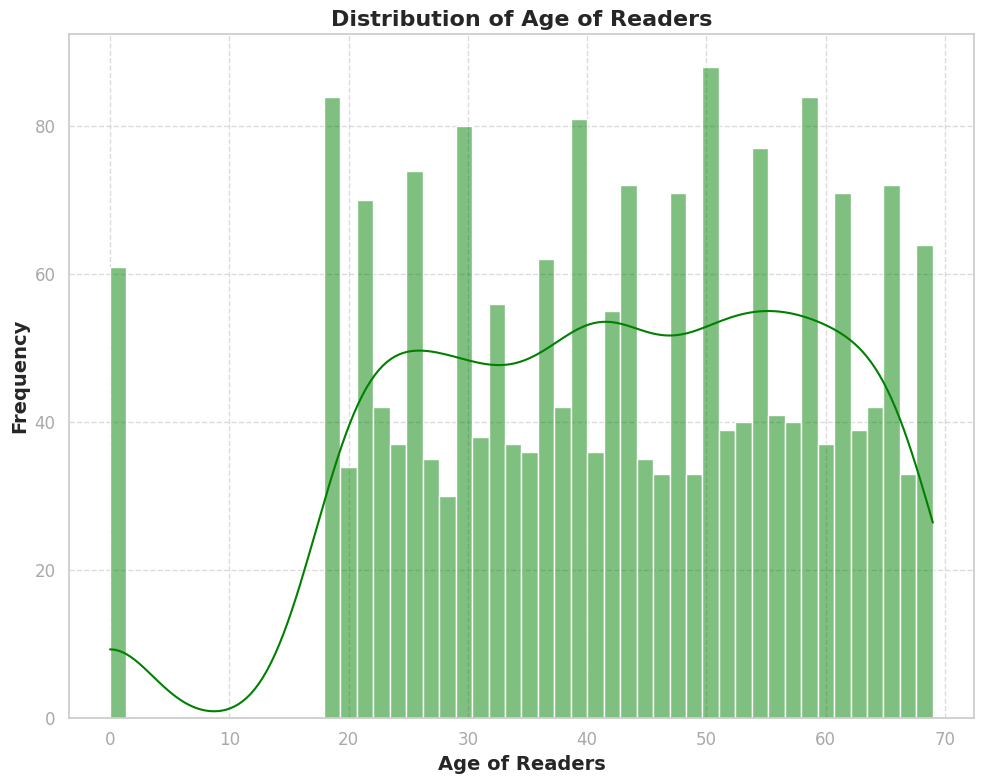

In [ ]:
# Set the style and context
sns.set(style='whitegrid', palette='pastel')

# Create the plot
plt.figure(figsize=(10, 8))
sns.histplot(df_data['age_of_reader'], bins=50, color='green', kde=True)

# Add titles and labels with customization
plt.title('Distribution of Age of Readers', fontsize=16, weight='bold')
plt.xlabel('Age of Readers', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')

# Customize the gridlines and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='darkgray')
plt.yticks(fontsize=12, color='darkgray')

# Show the plot
plt.tight_layout()
plt.show()